In [1]:
import pandas as pd
import scipy

from JC_functions import *
from JC_momenst import *

RAW_PATH = "D:\_WPI\geom_learn\Shared_Files\python_\Geometric-Learning\data\Flavia.mat"

In [2]:
A_raw = scipy.io.loadmat(RAW_PATH)
leaves = A_raw['Flavia_rotated_clean']

df = pd.read_excel(r"D:\_WPI\geom_learn\Shared_Files\python_\Geometric-Learning\data\labels.xlsx")
df = df.dropna()
df = df.sort_values(df.columns[1])
labels = df.iloc[:, 2].to_numpy()

N, d, c = leaves.shape

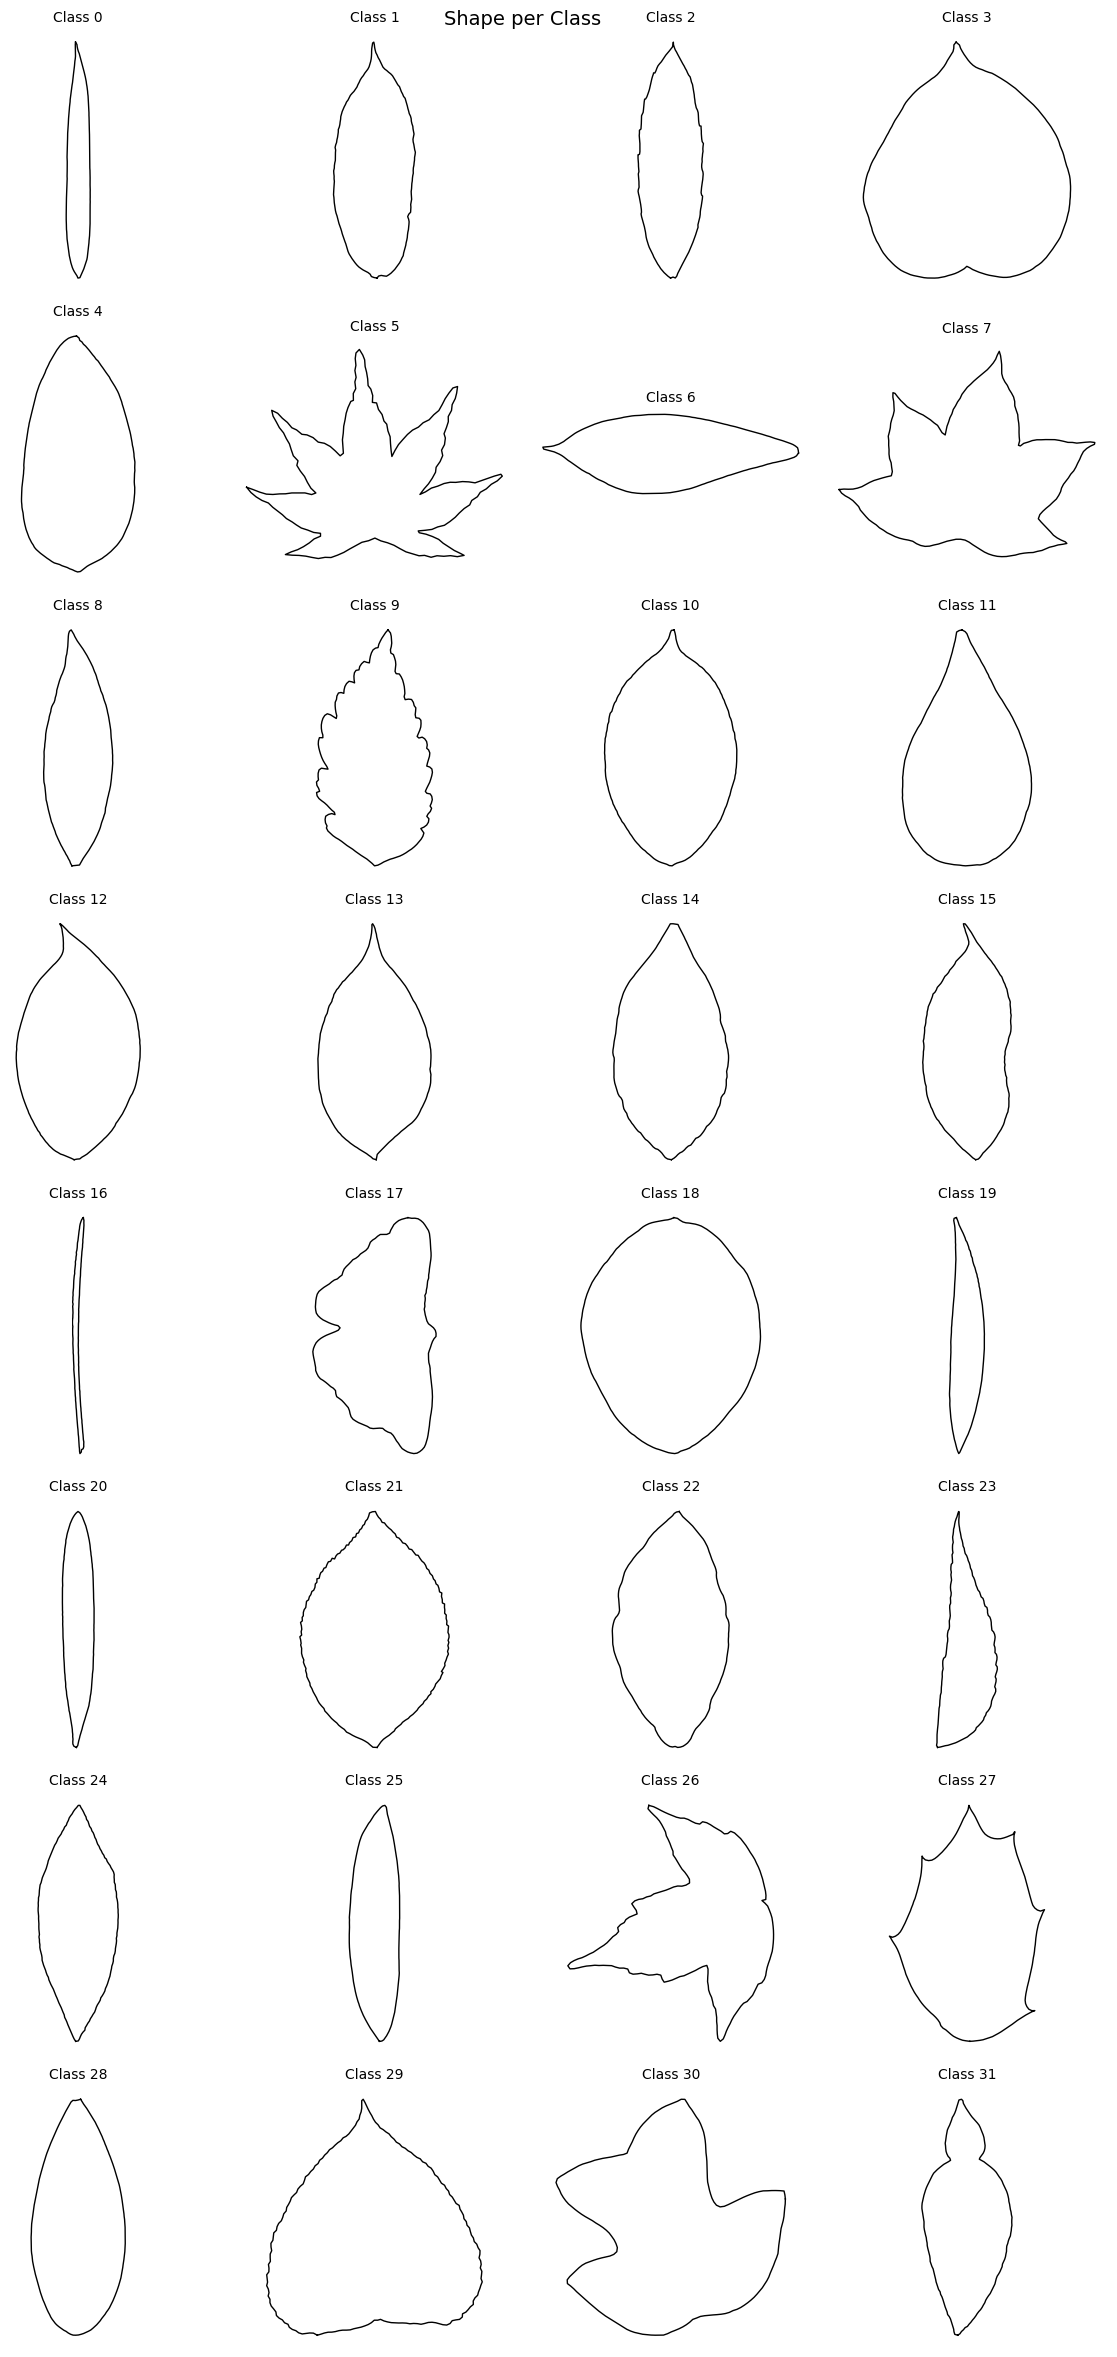

In [3]:
complex_leaves = np.array([Normalize(shape_to_complex(reparametrize_by_arc_length(leaves[i], 200, False)[1][:-1])) for i in range(N)])

import numpy as np
import matplotlib.pyplot as plt
from itertools import islice


shape_per_class = one_polygon_per_class(complex_leaves, labels)

classes = sorted(shape_per_class.keys())
n_classes = len(classes)

# ---- Create grid dynamically ----
ncols = 4
nrows = int(np.ceil(n_classes / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))
axes = np.atleast_1d(axes).ravel()

# ---- Plot ----
for ax, lab in zip(axes, classes):
    plot_polygon(ax, shape_per_class[lab], color="black", lw=1)
    ax.set_title(f"Class {lab}", fontsize=10)

# ---- Remove unused axes ----
for ax in islice(axes, n_classes, None):
    ax.remove()

plt.suptitle("Shape per Class", fontsize=14)
plt.tight_layout()
plt.show()



In [4]:
feature_dicts = [features_13(remove_duplicate_vertices(leaf)) for leaf in complex_leaves]

feature_names = list(feature_dicts[0].keys())
X_real = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name]
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X_imag = np.array([
    [fd[name].imag if np.iscomplexobj(fd[name]) else 0.0
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X = np.concatenate([X_real, X_imag], axis=1)

The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Comp

Dimension of ambient space: 26,
Estimated global dimension: 10,
The estimated dimensions per class are: [5 5 5 3 5 4 6 5 5 5 5 6 4 5 5 5 4 5 4 6 5 5 6 5 5 6 5 5 5 4 4 6], 
Upper bound local dimension = 6, 
Centroids positions = [[ 1.52895813e+00 -2.82367564e+00]
 [-8.86975265e-01 -7.48113294e-01]
 [-6.98421837e-01 -1.19486966e+00]
 [-3.98403441e+00  2.65071179e+00]
 [-1.70499852e+00  7.61907308e-02]
 [ 2.90262210e+00  4.88544789e+00]
 [-5.99584735e-01 -1.26901796e+00]
 [ 1.21927926e-01  2.41223141e+00]
 [-6.66479729e-01 -1.10232045e+00]
 [ 5.62171494e-01  2.57209288e+00]
 [-1.79892400e+00 -1.73094497e-04]
 [-1.92075183e+00 -1.61123628e+00]
 [-1.87208307e+00 -6.71978607e-01]
 [-1.26479000e+00 -5.61868251e-01]
 [-1.43771812e+00 -9.13665660e-01]
 [-1.55835164e+00 -4.79583359e-01]
 [ 9.00814824e+00 -2.38532119e+00]
 [-9.40923600e-01  1.13212066e+00]
 [-2.00264130e+00  2.39027146e-01]
 [-2.03364768e-01 -2.20665675e+00]
 [ 8.58088912e-01 -2.19907428e+00]
 [-1.46625667e+00 -3.74555512e-01]
 [

C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


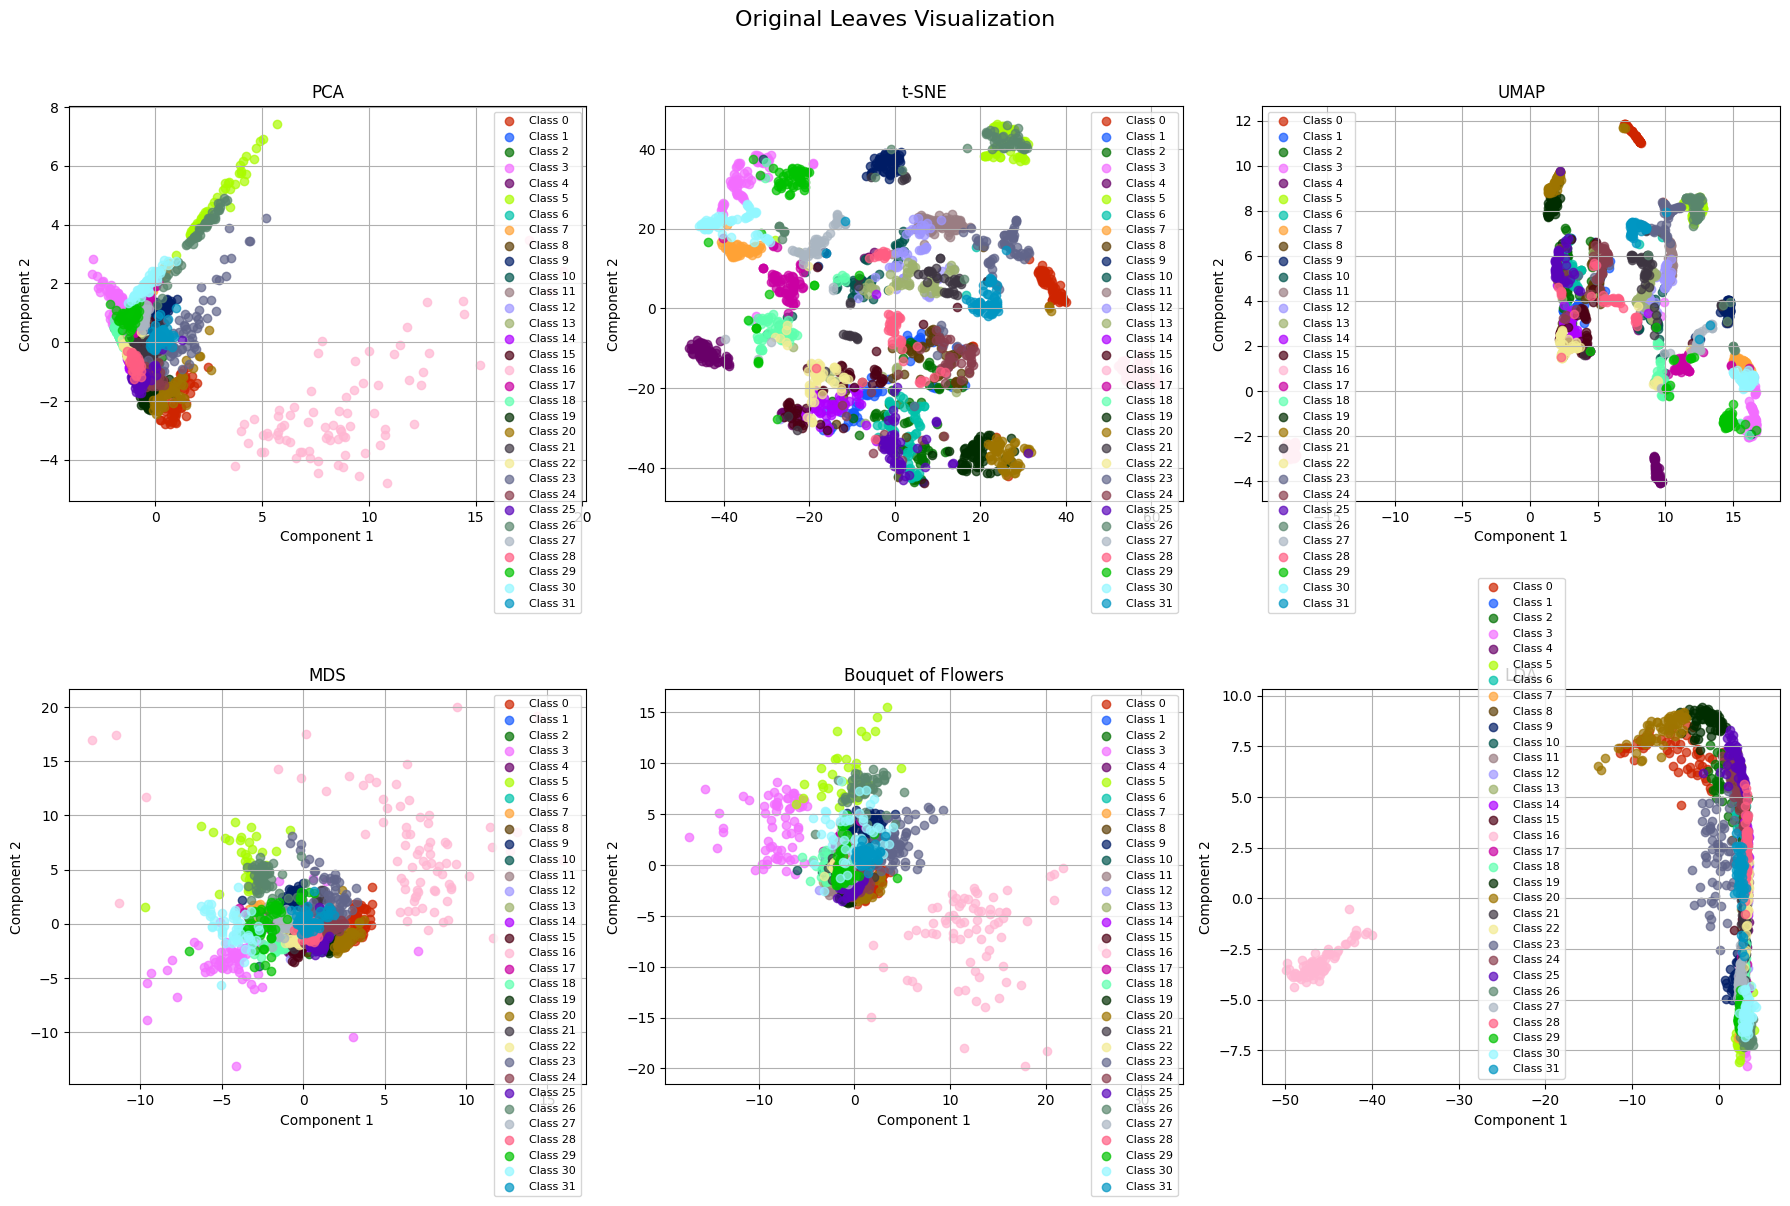

In [5]:
labels = np.asarray(labels).astype(int)
plot_2D(X, labels)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, labels,
    test_size=0.25,
    random_state=42,
    stratify=labels
)

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)



y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Test accuracy: 0.8931

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.78      0.88      0.82        16
           2       0.94      0.94      0.94        16
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        14
           6       0.78      0.88      0.82        16
           7       1.00      1.00      1.00        13
           8       0.57      0.57      0.57        14
           9       1.00      1.00      1.00        15
          10       0.60      0.75      0.67        12
          11       0.94      1.00      0.97        16
          12       0.91      0.77      0.83        13
          13       0.76      0.81      0.79        16
          14       0.80      0.53      0.64        15
          15       0.76      0.93      0.84        14
          16       1.00      1.00  

#### Second Thirteen

In [7]:
feature_dicts = [thirteen(remove_duplicate_vertices(leaf)) for leaf in complex_leaves]

feature_names = list(feature_dicts[0].keys())
X_real = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name]
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X_imag = np.array([
    [fd[name].imag if np.iscomplexobj(fd[name]) else 0.0
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X = np.concatenate([X_real, X_imag], axis=1)

Dimension of ambient space: 26,
Estimated global dimension: 8,
The estimated dimensions per class are: [5 4 5 4 4 3 5 4 4 4 3 4 4 4 4 5 5 5 3 5 5 4 4 5 4 4 4 4 3 4 4 5], 
Upper bound local dimension = 5, 
Centroids positions = [[ 3.22929872  0.10680257]
 [-1.07126033 -0.34913178]
 [-0.92738622 -0.86688686]
 [-2.53739604 -1.9616981 ]
 [-1.48794277 -0.99641739]
 [ 3.48739024  4.60078635]
 [-1.5665537   0.05790938]
 [ 0.32798399  2.43431333]
 [-1.44842717 -0.07985142]
 [ 0.35049206  2.43070241]
 [-1.70951186 -0.69959313]
 [ 0.07862616  2.44616176]
 [-1.13047635  0.55378756]
 [-1.12840506  0.47825208]
 [-1.38272438 -0.62911359]
 [-1.19910976 -0.35926744]
 [ 8.58499096 -3.87453433]
 [-1.48545791  0.01764918]
 [-2.15227695 -1.30127813]
 [-0.51400386 -2.12863752]
 [ 0.8022319  -2.22780196]
 [-0.53539461  1.59457353]
 [-1.40294052 -0.57279992]
 [ 2.030084    3.02990906]
 [-1.61020252 -0.45484407]
 [-1.03773049 -1.41195424]
 [ 2.44368835  3.45187546]
 [-1.55450635  0.24499615]
 [-1.11864595 -0.

C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


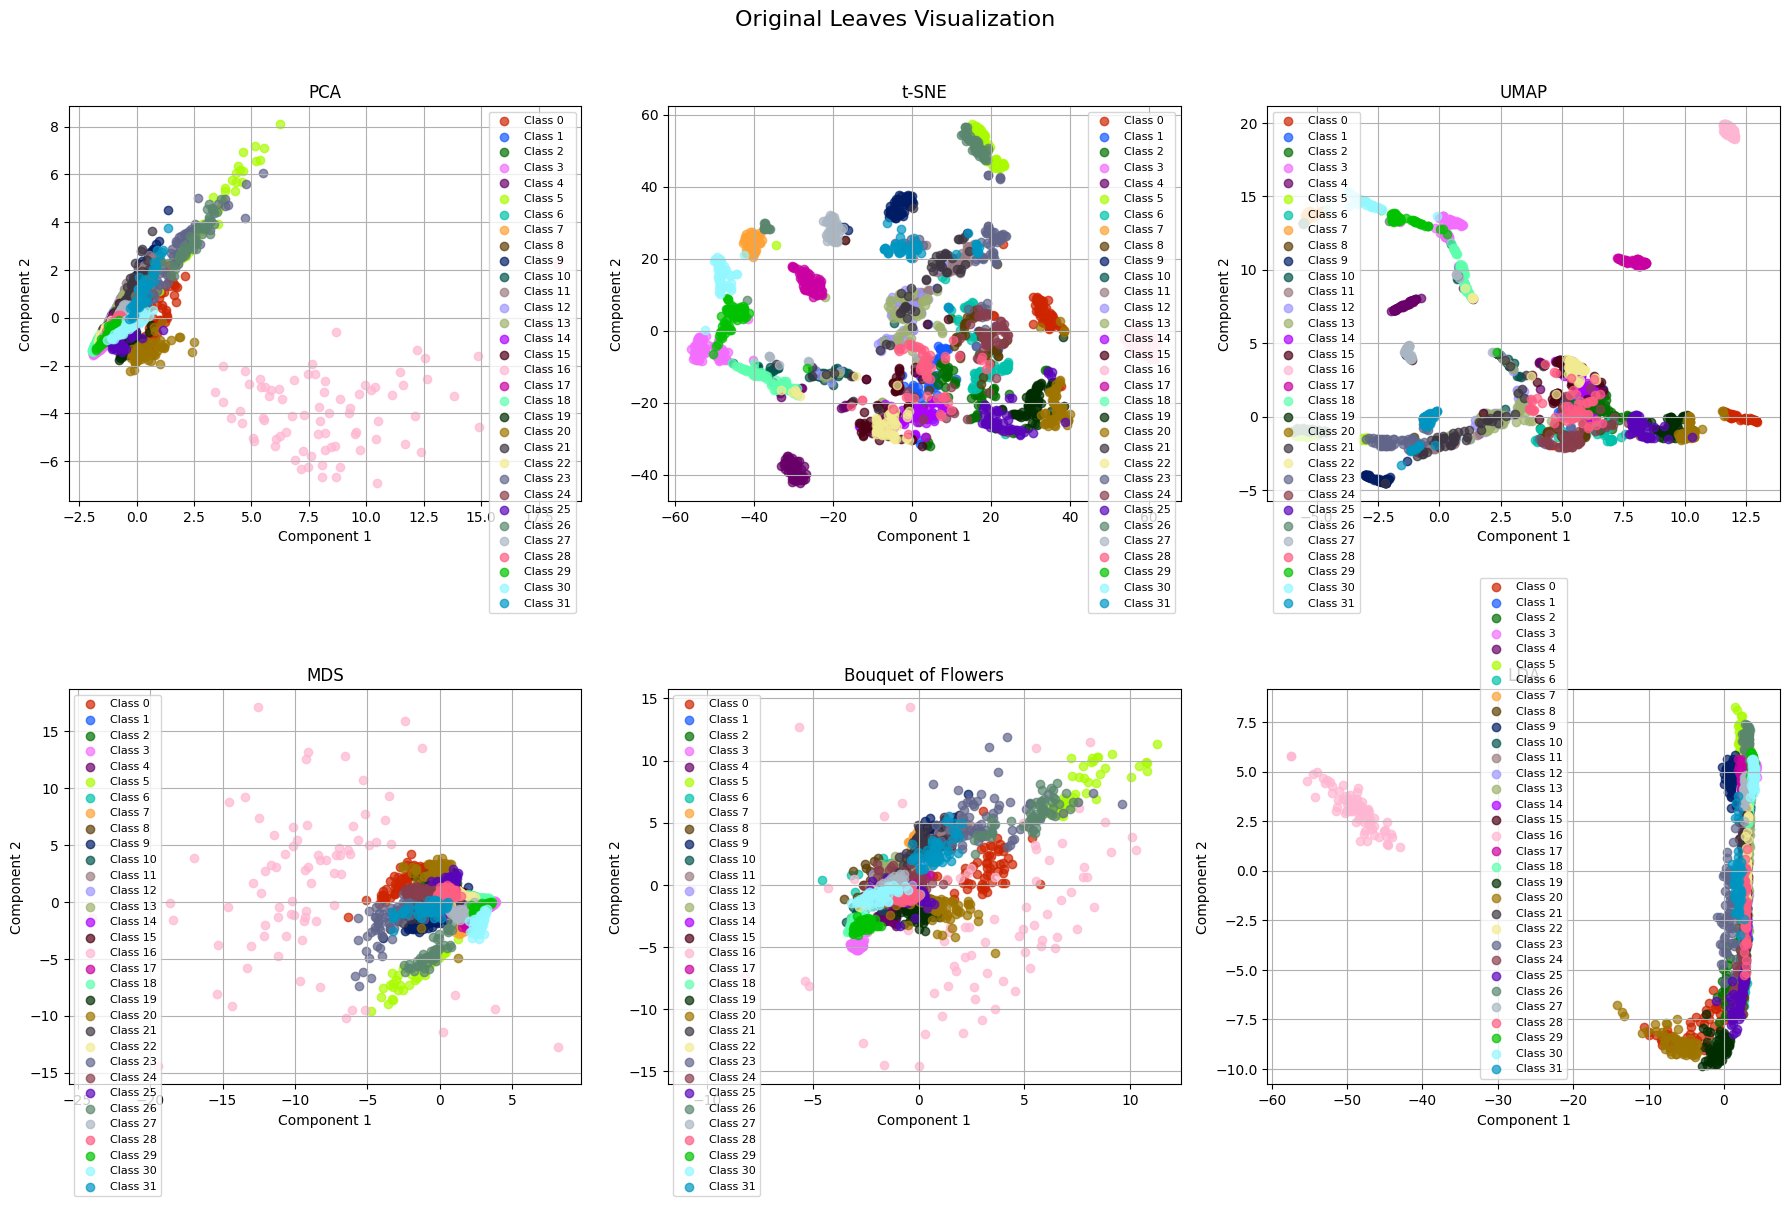

In [8]:
labels = np.asarray(labels).astype(int)
plot_2D(X, labels)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
RF_classifier(X_scaled, labels)


Test accuracy: 0.8553

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.78      0.88      0.82        16
           2       1.00      0.94      0.97        16
           3       0.89      0.94      0.92        18
           4       1.00      0.94      0.97        18
           5       1.00      1.00      1.00        14
           6       0.76      0.81      0.79        16
           7       1.00      1.00      1.00        13
           8       0.64      0.50      0.56        14
           9       1.00      0.93      0.97        15
          10       0.59      0.83      0.69        12
          11       0.94      1.00      0.97        16
          12       0.82      0.69      0.75        13
          13       0.61      0.69      0.65        16
          14       0.55      0.40      0.46        15
          15       0.73      0.79      0.76        14
          16       1.00      1.00  